In [1]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import DEG UP & DOWN data 

In [2]:
deg_na = pd.read_csv('11_identify_DEG/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='n_vs_a')
deg_nr = pd.read_csv('11_identify_DEG/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='n_vs_r')
deg_ar = pd.read_csv('11_identify_DEG/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='a_vs_r')

In [3]:
# drop rows that contains NaN in the padj column 
deg_na = deg_na.dropna(subset=['padj'])
deg_nr = deg_nr.dropna(subset=['padj'])
deg_ar = deg_ar.dropna(subset=['padj'])


In [4]:

# filter for NaN in log2FoldChange column 
deg_na = deg_na.dropna(subset=['log2FoldChange'])
deg_nr = deg_nr.dropna(subset=['log2FoldChange'])
deg_ar = deg_ar.dropna(subset=['log2FoldChange'])

# Split UP & DOWN regulated genes 

In [5]:
# split dataframe by log2FoldChange column. positive values are upregulated, negative values are downregulated
deg_na_up = deg_na[(deg_na['log2FoldChange'] > 0) & (deg_na['padj'] <= 0.05)]
deg_na_down = deg_na[(deg_na['log2FoldChange'] < 0) & (deg_na['padj'] <= 0.05)]
deg_nr_up = deg_nr[(deg_nr['log2FoldChange'] > 0) & (deg_nr['padj'] <= 0.05)]
deg_nr_down = deg_nr[(deg_nr['log2FoldChange'] < 0) & (deg_nr['padj'] <= 0.05)]
deg_ar_up = deg_ar[(deg_ar['log2FoldChange'] > 0) & (deg_ar['padj'] <= 0.05)]
deg_ar_down = deg_ar[(deg_ar['log2FoldChange'] < 0) & (deg_ar['padj'] <= 0.05)]


print('deg_na_up:', len(deg_na_up))
print('deg_na_down:', len(deg_na_down))
print('total:', len(deg_na_up) + len(deg_na_down))
print('deg_nr_up:', len(deg_nr_up))
print('deg_nr_down:', len(deg_nr_down))
print('total:', len(deg_nr_up) + len(deg_nr_down))
print('deg_ar_up:', len(deg_ar_up))
print('deg_ar_down:', len(deg_ar_down))
print('total:', len(deg_ar_up) + len(deg_ar_down))

deg_na_up: 322
deg_na_down: 207
total: 529
deg_nr_up: 151
deg_nr_down: 59
total: 210
deg_ar_up: 163
deg_ar_down: 69
total: 232


# Create dict for PLOT

In [6]:
# create a dict with the names of the dataframes as keys and the len(dataframe) as value 
# all *_up dataframes should have a positive value in the dict len(dataframe)
# this is used to create a barplot
dict_len = {'deg_na_up': len(deg_na_up), 'deg_na_down': -len(deg_na_down), 'deg_nr_up': len(deg_nr_up), 'deg_nr_down': -len(deg_nr_down), 'deg_ar_up': len(deg_ar_up), 'deg_ar_down': -len(deg_ar_down)}

In [7]:
dict_len    

{'deg_na_up': 322,
 'deg_na_down': -207,
 'deg_nr_up': 151,
 'deg_nr_down': -59,
 'deg_ar_up': 163,
 'deg_ar_down': -69}

# PLOT

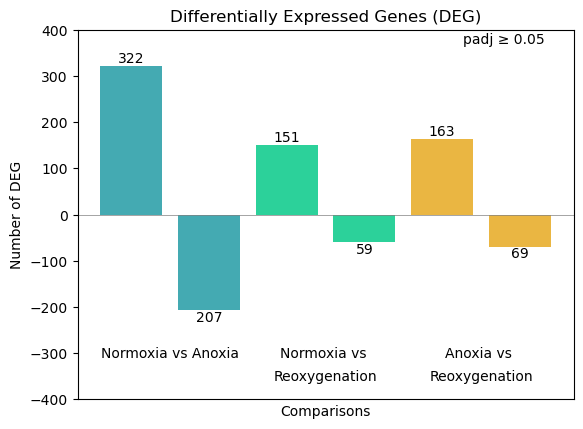

In [8]:

# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
plt.bar(categories, values, color='skyblue')
plt.title("Differentially Expressed Genes (DEG)")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")


# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black')
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black')

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color=['#44AAB2', '#44AAB2', '#2CD19A', '#2CD19A', '#EAB642', '#EAB642' ])

# extand the y scale from -500 to +700
plt.ylim(-400, 400)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -300, 'Normoxia vs Anoxia', ha='center', va='center', color='black')
plt.text(2.5, -300, 'Normoxia vs ', ha='center', va='center', color='black')
plt.text(2.5, -350, 'Reoxygenation', ha='center', va='center', color='black')
plt.text(4.5, -300, 'Anoxia vs ', ha='center', va='center', color='black')
plt.text(4.5, -350, 'Reoxygenation', ha='center', va='center', color='black')

# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 380, 'padj ≥ 0.05', ha='center', va='center', color='black')

# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('11_identify_DEG/DEG_barplot.png', dpi=300, bbox_inches='tight')
plt.savefig('11_identify_DEG/DEG_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


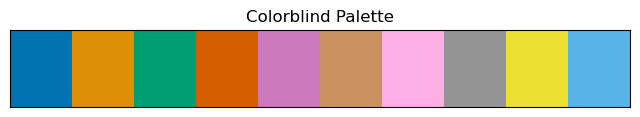

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn to the colorblind theme
sns.set_palette("colorblind")

# Get all colors in the colorblind palette
colorblind_palette = sns.color_palette("colorblind")

# Create a bar plot to display the colors
fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([colorblind_palette], aspect='auto', extent=(0, len(colorblind_palette), 0, 1))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Colorblind Palette')

plt.show()



# Export DEG UP & DOWN as dataframes (to corralte with DMR)

In [10]:
# export deg as dataframe  
deg_na = deg_na.loc[deg_na['padj'] <= 0.05]
deg_nr = deg_nr.loc[deg_nr['padj'] <= 0.05]
deg_ar = deg_ar.loc[deg_ar['padj'] <= 0.05]
deg_na.to_csv('11_identify_DEG/deg_na.txt', index=False) 
deg_nr.to_csv('11_identify_DEG/deg_nr.txt', index=False)
deg_ar.to_csv('11_identify_DEG/deg_ar.txt', index=False)


In [11]:
print(len(deg_na))
print(len(deg_nr))
print(len(deg_ar))


529
210
232
